<a href="https://colab.research.google.com/github/ASEVlad/ML-homework-2/blob/master/ML_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [0]:
upload = files.upload()
data = pd.read_csv('Admission_Predict.csv', error_bad_lines=False)
print(data.info())

Saving Admission_Predict.csv to Admission_Predict (5).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [0]:
data = data.drop('Serial No.', axis=1)
data.info()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


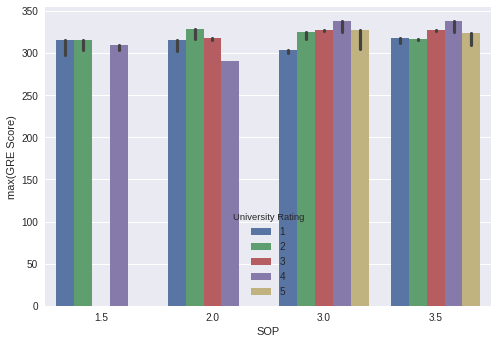

In [0]:
sns.barplot(x='SOP', y ='GRE Score', estimator=max, hue='University Rating', order=[1.5,2.0,3.0,3.5], data=data)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


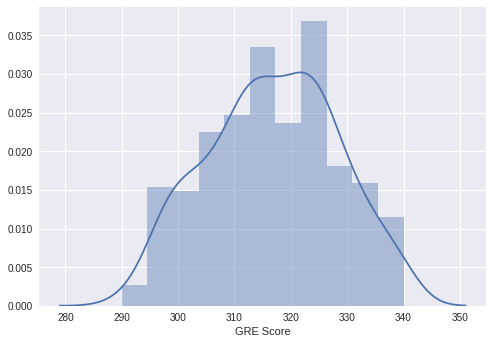

In [0]:
sns.distplot(data['GRE Score'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


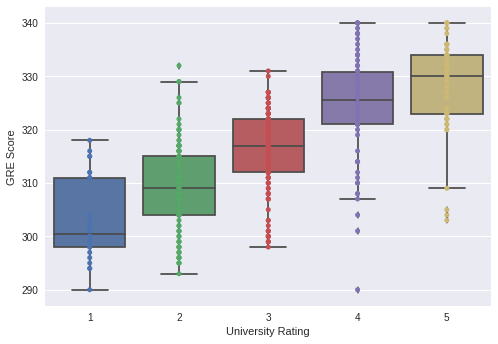

In [0]:
sns.boxplot(y = 'GRE Score', x = 'University Rating', data=data)
sns.stripplot(y = 'GRE Score', x = 'University Rating', data=data, size=5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


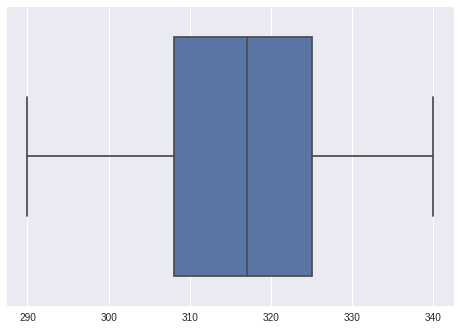

In [0]:
sns.boxplot(['GRE Score'], data=data, orient='h')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


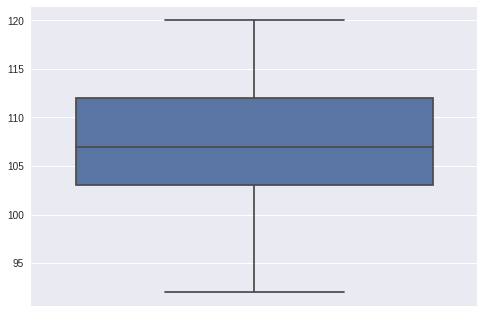

In [0]:
sns.boxplot(['TOEFL Score'], data=data, orient='v')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


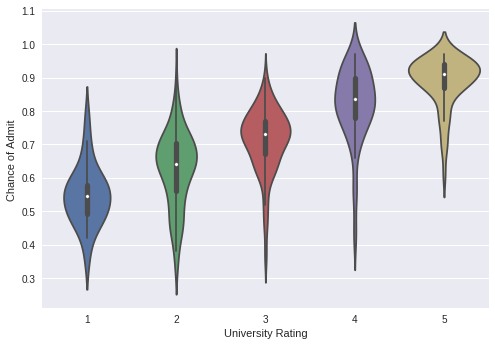

In [0]:
sns.violinplot(y = 'Chance of Admit ', x = 'University Rating', orient='v', data=data)

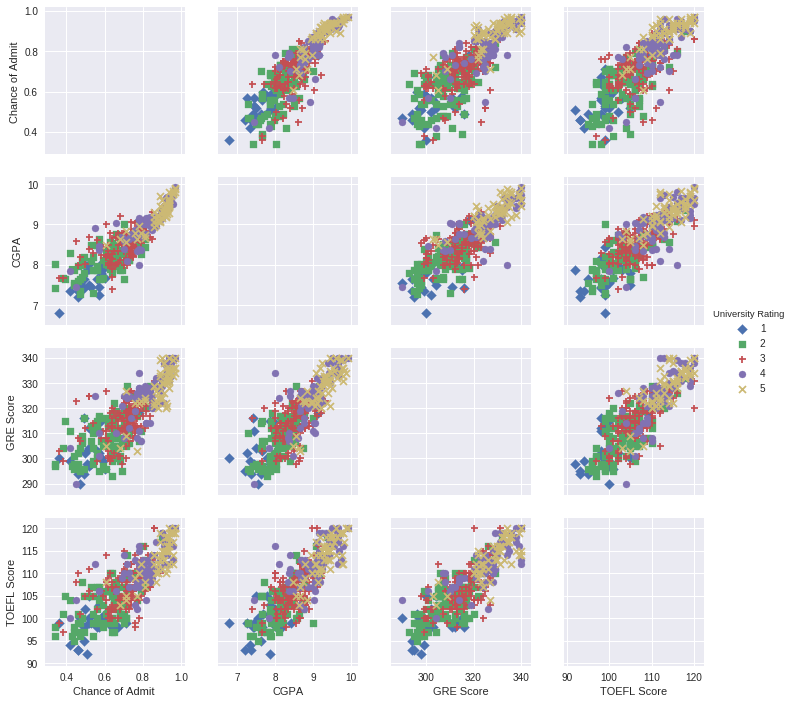

In [0]:
x = sns.PairGrid(data, vars=['Chance of Admit ', 'CGPA', 'GRE Score', 'TOEFL Score'], hue='University Rating', hue_kws={'marker':['D','s','+', "o", "x"]})
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

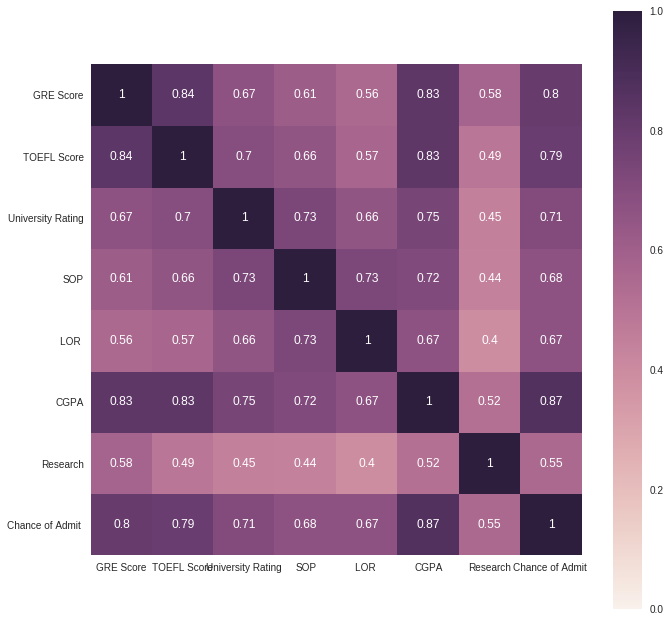

In [0]:
corr = data.iloc[:, :].corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, annot=True, square=True, vmin=0)

In [0]:
def get_accuracy_f1(model, X_train, Y_train):
    scores_acc = cross_val_score(model, X_train, Y_train, cv = 10)
    scores_f1 = cross_val_score(model, X_train, Y_train, cv = 10, scoring = 'f1_macro')
    return [scores_acc.mean(), scores_f1.mean()]

In [0]:
X_train, X_test, y_train, Y_test = train_test_split(data[['TOEFL Score', 'Chance of Admit ', 'University Rating', 'SOP']], data['Research'], shuffle=False, test_size=0.2)
svm = LinearSVC()
svm_rbf = SVC(kernel = 'rbf')
rf = RandomForestClassifier()
zoo = [(svm, 'SVM'), (rf, 'Random Forests'), (svm_rbf, 'SVM(rbf)')]
mas_of_results = list()
for model in zoo:
    mas_of_results.append(get_accuracy_f1(model[0], X_train, Y_train))

In [0]:
for i in range(len(mas_of_results)):
  print(f'Model:{zoo[i][1]} Accuracy:{mas_of_results[i][0]}; F1-score:{mas_of_results[i][1]}; Mean:{(mas_of_results[i][0]+mas_of_results[i][1])/2}')

Model:SVM Accuracy:0.5632239736070381; F1-score:0.3325785734583689; Mean:0.4479012735327035
Model:Random Forests Accuracy:0.6813660801564028; F1-score:0.6481267305997291; Mean:0.664746405378066
Model:SVM(rbf) Accuracy:0.7251527370478985; F1-score:0.7232256859039885; Mean:0.7241892114759435


In [0]:
best_model = svm_rbf
best_model.fit(X_train, Y_train)
predict = best_model.predict(X_test)
print(f'Accuracy : {accuracy_score(predict, np.array(Y_test))}, F1-score : {f1_score(predict, np.array(Y_test))}')

Accuracy : 0.7, F1-score : 0.6842105263157895


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
